In [49]:
from sklearn.datasets import load_iris

iris = load_iris()

print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [50]:
import numpy as np

In [51]:
data = iris['data']

In [53]:
data.shape

(150, 4)

In [54]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Let's plot sepal length versus petal length

In [55]:
import matplotlib.pyplot as plt

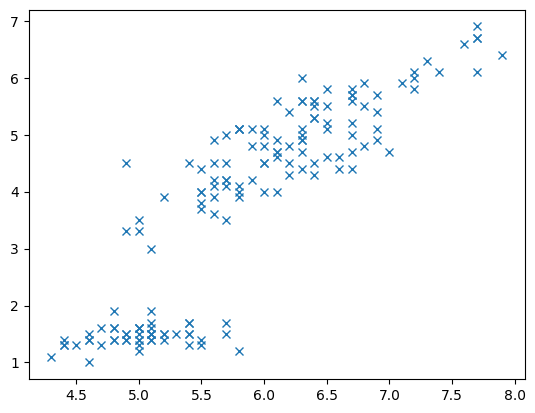

In [56]:
plt.plot(data[:,0], data[:,2],'x')

In [58]:
data1 = data[data[:,2] > 2]

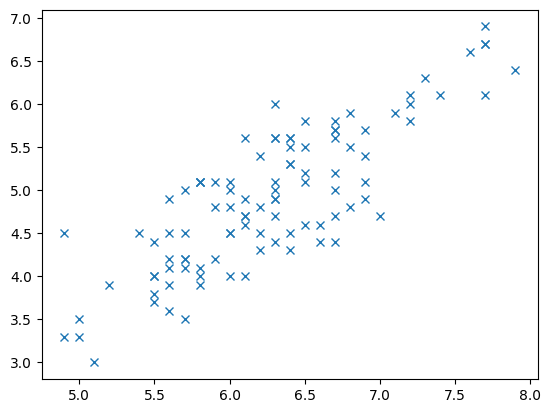

In [59]:
plt.plot(data1[:,0], data1[:,2],'x')

We can use this data to fit a line using linear_regression

In [73]:
x = data1[:,0]
y = data1[:,2]

In [74]:
x.shape

(100,)

In [75]:
y.shape

(100,)

In [76]:
# reshape features
x.shape = 100,1

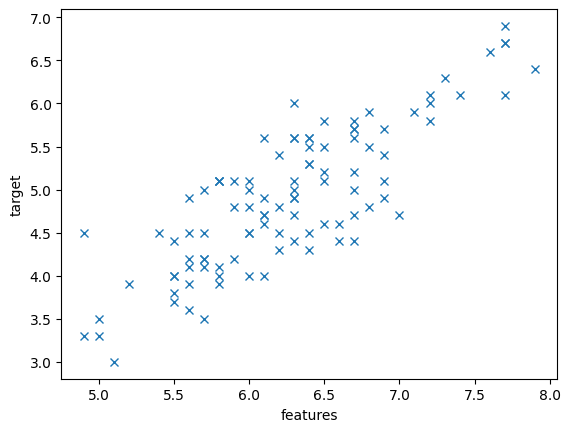

In [77]:
plt.xlabel('features')
plt.ylabel('target')
plt.plot(x, y, 'x')

In [78]:
def model(w):
    _w = w.copy()
    
    def f(x):
        return np.inner(_w[1:], x) + w[0]
    
    return f

In [79]:
m1 = model(np.ones((2,)))

In [80]:
x[0]

array([7.])

In [81]:
m1(x[0])

8.0

In [86]:
def loss(w):
    _m = model(w)
    
    def f(x,y):
        sos = 0.0
        for xi, yi in zip(x,y):
            sos += np.power(_m(xi) - yi, 2)
        return sos / x.shape[0]
    
    return f

In [87]:
l1 = loss(np.ones((2,)))

In [88]:
l1(x, y)

5.762799999999999

In [85]:
def step(x, y, w):
    _x = x
    _y = y
    _m = model(w)
    
    def f(j):
        sos = 0.0
        for xi, yi in zip(_x,_y):
            sos += 2 * (_m(xi) - yi) * (1 if j == 0 else xi[j-1])
        return sos / _x.shape[0]
    
    return f

In [89]:
s1 = step(x, y, np.ones((2,)))

In [90]:
s1(0)

4.712

In [91]:
s1(1)

29.47880000000001

In [92]:
w = np.ones((2,))

In [93]:
w

array([1., 1.])

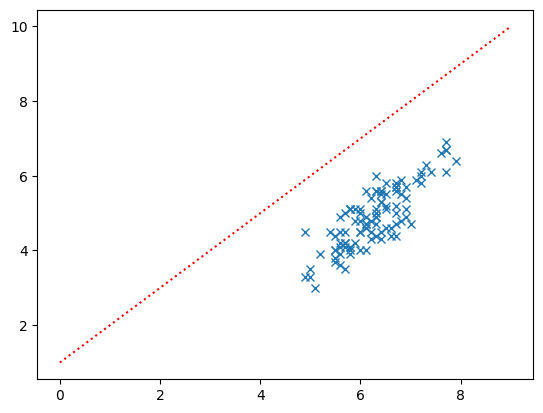

In [105]:
plt.plot(x,y,'x')
plt.plot(w[1] * np.arange(10) + w[0], ':r')

In [106]:
s1(0)

4.712

In [110]:
alpha = 0.01

In [111]:
w[0] -= alpha * s1(0)

In [112]:
w[1] -= alpha * s1(1)

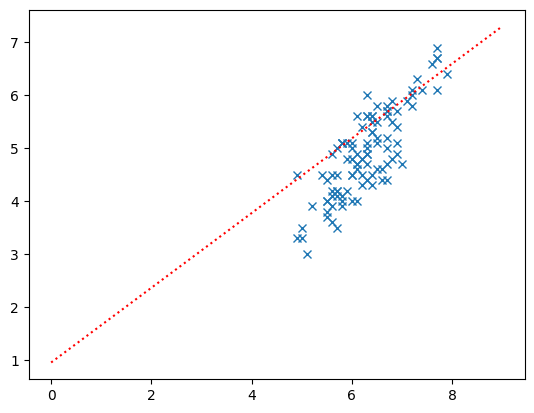

In [113]:
plt.plot(x,y,'x')
plt.plot(w[1] * np.arange(10) + w[0], ':r')

In [114]:
l2 = loss(w)

In [115]:
l2(x, y) # the loss function has decreased from 5.762799999999999 to 0.4723329119671742

0.4723329119671742

In [116]:
s2 = step(x, y, w)

In [117]:
s2(0), s2(1)

(0.9258350879999989, 5.513395702399992)

In [118]:
w[0] -= alpha * s2(0)
w[1] -= alpha * s2(1)

In [119]:
def show_plot():
    plt.plot(x,y,'x')
    plt.plot(w[1] * np.arange(10) + w[0], ':r')

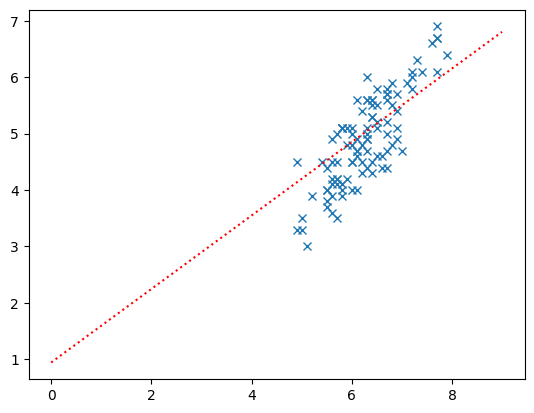

In [120]:
show_plot()

In [121]:
l3 = loss(w)

In [122]:
l3(x, y) # the loss function has decreased further

0.28802587913458627

In [123]:
# Now, let's fast forward ten iteration!
for _ in range(10):
    s = step(x, y, w)
    
    w[0] -= alpha * s(0)
    w[1] -= alpha * s(1)

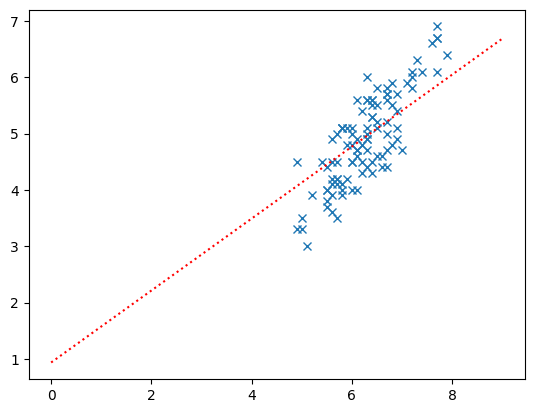

In [124]:
show_plot()

In [125]:
l4 = loss(w)

In [126]:
l4(x, y) # the rate at which the loss function decreases as also decrease indicating we have reaching the minima

0.27973142532255013

In [127]:
# after, ten more iteration
for _ in range(10):
    s = step(x, y, w)
    
    w[0] -= alpha * s(0)
    w[1] -= alpha * s(1)

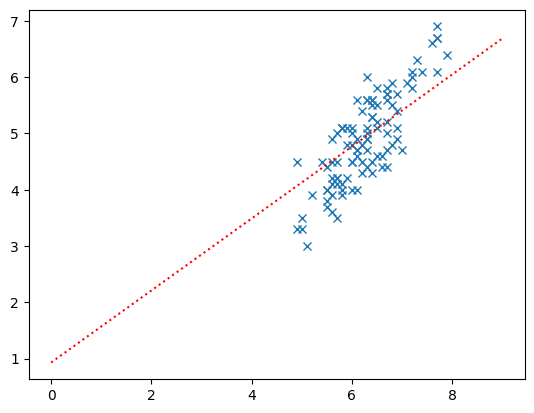

In [128]:
show_plot()

In [129]:
l5 = loss(w)

In [130]:
l5(x, y)

0.2794346962980122

In [131]:
l4(x, y) - l5(x, y) # difference in loss function l4 and l5 is in order 10^-5 == 0.0001

3.072646165602766e-05